In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import pandas as pd
from ipywidgets import interactive, IntSlider, FloatSlider, VBox, HBox, fixed

In [3]:
n = 200
np.random.seed(42)
white_noise = np.random.normal(loc=0, scale=1, size=n)

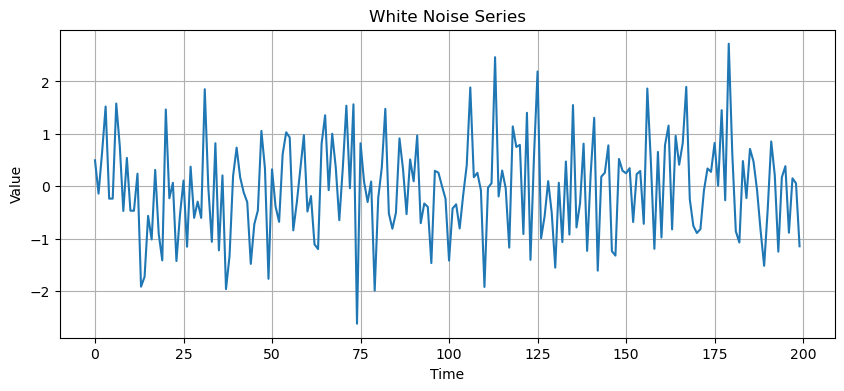

In [4]:
# Plot white noises' time series
plt.figure(figsize=(10,4))
plt.plot(white_noise)
plt.title("White Noise Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

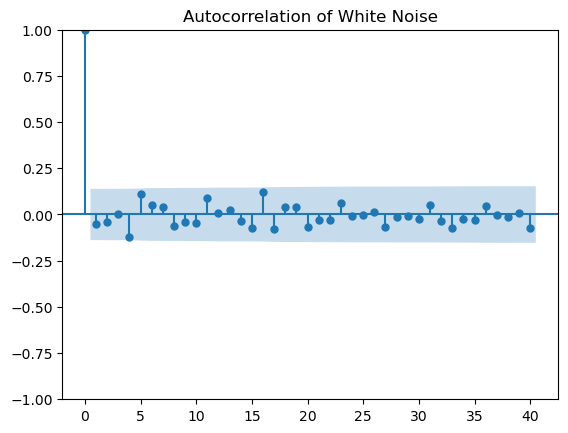

In [5]:
# Plot white noises' ACF
# Should be close to zero for all lags if data is white noise.
plot_acf(white_noise, lags=40)
plt.title("Autocorrelation of White Noise")
plt.show()

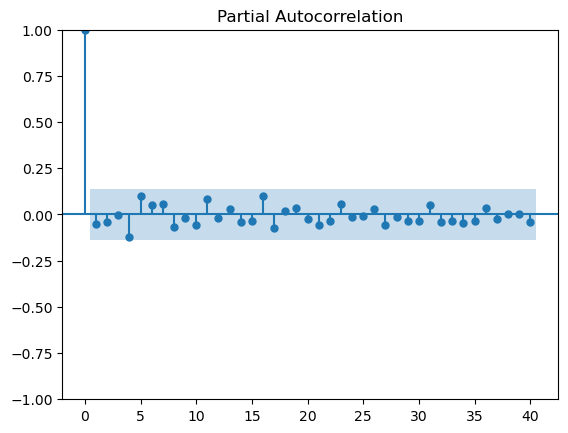

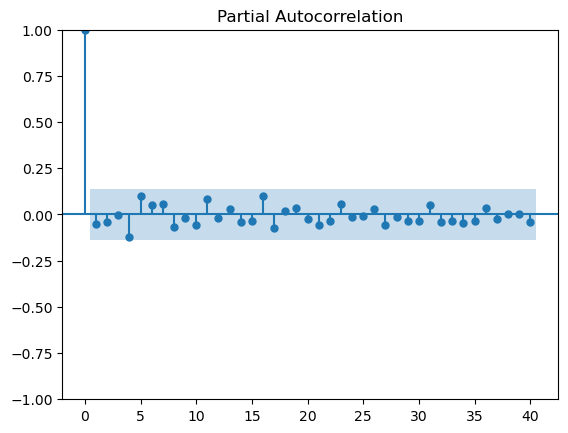

In [6]:
# Plot white noises' PACF
# Like ACF, but shows the "direct" relationship between values at lag k.
plot_pacf(white_noise, lags=40)

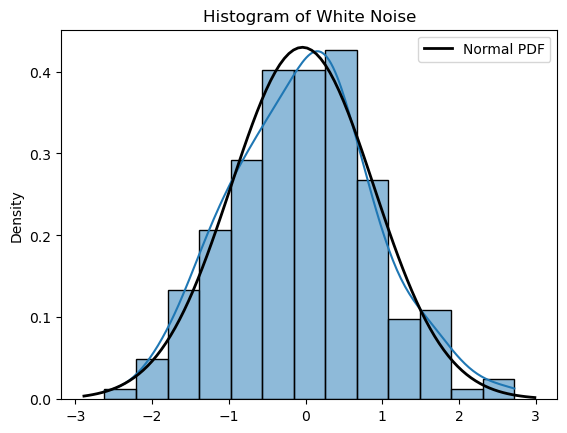

In [7]:
# Plot white noises' Histogram + KDE + Normality line
# KDE = Kernel Density Estimate, a smoothed approximation of the data's distribution.
# The black line is the theoretical normal distribution curve (same mean and std as data).
sns.histplot(white_noise, kde=True, stat="density")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(white_noise), np.std(white_noise))
plt.plot(x, p, 'k', linewidth=2, label='Normal PDF')
plt.title("Histogram of White Noise")
plt.legend()
plt.show()

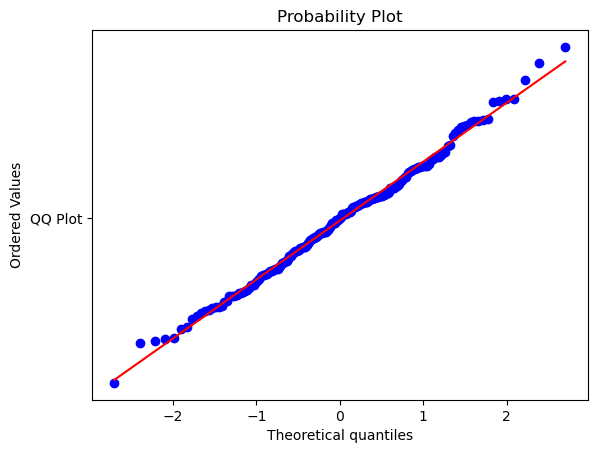

In [8]:
# Plot white noises' QQ plot
# Compares quantiles of your data to a normal distribution.
# If data is normally distributed, the points should lie along the line.
stats.probplot(white_noise, dist="norm", plot=plt)
plt.plot("QQ Plot")
plt.show()

In [13]:
# Plot white noises' Ljung-Box Test
# This is a statistical test to check for autocorrelation up to lag h.
# H0 (null): the data is independently distributed (no autocorrelation).
# A low p-value (< 0.05) would indicate significant autocorrelation (i.e., not white noise).
lb_test = acorr_ljungbox(white_noise, lags=[10], return_df=True)
print("Ljung-Box Test (H0: no autocorrelation):")
print(lb_test)

Ljung-Box Test (H0: no autocorrelation):
     lb_stat  lb_pvalue
10  8.849179   0.546474


In [18]:
def generate_ar_process(phi_values, n=200, burn_in=50, sigma=1, seed=42):
    """
    Simulates an AR(p) process.
    
    Parameters:
    - phi_values: list of phi coefficients [phi1, phi2, ..., phip]
    - n: desired length of output time series (after burn-in)
    - burn_in: number of initial values to discard for stability
    - sigma: standard deviation of white noise
    - seed: for reproducibility
    """
    np.random.seed(seed)
    p = len(phi_values)
    total_length = n + burn_in  # simulate extra steps to remove startup bias
    x = np.zeros(total_length)
    eps = np.random.normal(0, sigma, total_length)  # white noise

    # Generate AR process
    for t in range(p, total_length):
        past_values = x[t-p:t][::-1]  # get last p values in reverse
        x[t] = np.dot(phi_values, past_values) + eps[t]

    return x[burn_in:]  # discard initial burn-in values for stability


In [20]:
def generate_ar_process(n, phi):
    p = len(phi)
    epsilon = np.random.normal(loc=0, scale=1, size=n)
    x = np.zeros(n)
    for t in range(p, n):
        x[t] = np.dot(phi, x[t-p:t][::-1]) + epsilon[t]
    return x

In [22]:
# AR(p) process generator
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import seaborn as sns
import pandas as pd


def generate_ar_process(n, phi):
    p = len(phi)
    epsilon = np.random.normal(loc=0, scale=1, size=n)
    x = np.zeros(n)
    for t in range(p, n):
        x[t] = np.dot(phi, x[t-p:t][::-1]) + epsilon[t]
    return x

def plot_ar(p=1, phi1=0.5, phi2=0.0, phi3=0.0):
    # Build phi vector depending on p
    phi = [phi1]
    if p > 1:
        phi.append(phi2)
    if p > 2:
        phi.append(phi3)
    phi = phi[:p]  # truncate to p
    
    np.random.seed(42)
    n = 200
    ar_series = generate_ar_process(n, phi)
    
    plt.figure(figsize=(12, 3))
    plt.plot(ar_series)
    plt.title(f"AR({p}) Time Series with phi={phi}")
    plt.grid(True)
    plt.show()
    
    plot_acf(ar_series, lags=40)
    plt.title(f"ACF of AR({p})")
    plt.show()
    
    plot_pacf(ar_series, lags=40)
    plt.title(f"PACF of AR({p})")
    plt.show()
    
    sns.histplot(ar_series, kde=True, stat="density")
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p_norm = stats.norm.pdf(x, np.mean(ar_series), np.std(ar_series))
    plt.plot(x, p_norm, 'k', linewidth=2, label='Normal PDF')
    plt.title(f"Histogram of AR({p})")
    plt.legend()
    plt.show()
    
    stats.probplot(ar_series, dist="norm", plot=plt)
    plt.title(f"QQ Plot of AR({p})")
    plt.show()
    
    lb_test = acorr_ljungbox(ar_series, lags=[10], return_df=True)
    print(f"Ljung-Box Test (AR({p})):")
    print(lb_test)
    
    desc = {
        "Mean": np.mean(ar_series),
        "Std Dev": np.std(ar_series),
        "Skewness": stats.skew(ar_series),
        "Kurtosis": stats.kurtosis(ar_series),
    }
    desc_df = pd.DataFrame(desc, index=[f"AR({p})"])
    print("\nDescriptive Statistics:")
    print(desc_df.round(4))

interactive_plot = interactive(
    plot_ar,
    p=IntSlider(min=1, max=3, step=1, value=1, description='Order p'),
    phi1=FloatSlider(min=-1, max=1, step=0.05, value=0.5, description='Phi 1'),
    phi2=FloatSlider(min=-1, max=1, step=0.05, value=0.0, description='Phi 2'),
    phi3=FloatSlider(min=-1, max=1, step=0.05, value=0.0, description='Phi 3'),
)

VBox([interactive_plot])


In [24]:
# MA(q) process generator
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import seaborn as sns
import pandas as pd
from ipywidgets import interactive, IntSlider, FloatSlider, VBox

def generate_ma_process(n, theta):
    """
    Generate an MA(q) process of length n.

    Parameters:
    - n (int): Length of time series.
    - theta (array-like): MA coefficients (length q).

    Returns:
    - x (np.array): MA(q) time series.
    """
    q = len(theta)
    epsilon = np.random.normal(loc=0, scale=1, size=n + q)  # extra for lag
    x = np.zeros(n)

    for t in range(n):
        noise_terms = epsilon[t + q - np.arange(q)]
        x[t] = epsilon[t + q] + np.dot(theta, noise_terms)
    return x

def plot_ma(q=1, theta1=0.5, theta2=0.0, theta3=0.0):
    # Build theta vector
    theta = [theta1]
    if q > 1:
        theta.append(theta2)
    if q > 2:
        theta.append(theta3)
    theta = theta[:q]  # truncate to order q
    
    np.random.seed(42)
    n = 200
    ma_series = generate_ma_process(n, theta)
    
    plt.figure(figsize=(12, 3))
    plt.plot(ma_series)
    plt.title(f"MA({q}) Time Series with θ={theta}")
    plt.grid(True)
    plt.show()
    
    plot_acf(ma_series, lags=40)
    plt.title(f"ACF of MA({q})")
    plt.show()
    
    plot_pacf(ma_series, lags=40)
    plt.title(f"PACF of MA({q})")
    plt.show()
    
    sns.histplot(ma_series, kde=True, stat="density")
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p_norm = stats.norm.pdf(x, np.mean(ma_series), np.std(ma_series))
    plt.plot(x, p_norm, 'k', linewidth=2, label='Normal PDF')
    plt.title(f"Histogram of MA({q})")
    plt.legend()
    plt.show()
    
    stats.probplot(ma_series, dist="norm", plot=plt)
    plt.title(f"QQ Plot of MA({q})")
    plt.show()
    
    lb_test = acorr_ljungbox(ma_series, lags=[10], return_df=True)
    print(f"Ljung-Box Test (MA({q})):")
    print(lb_test)
    
    desc = {
        "Mean": np.mean(ma_series),
        "Std Dev": np.std(ma_series),
        "Skewness": stats.skew(ma_series),
        "Kurtosis": stats.kurtosis(ma_series),
    }
    desc_df = pd.DataFrame(desc, index=[f"MA({q})"])
    print("\nDescriptive Statistics:")
    print(desc_df.round(4))

interactive_plot = interactive(
    plot_ma,
    q=IntSlider(min=1, max=3, step=1, value=1, description='Order q'),
    theta1=FloatSlider(min=-1, max=1, step=0.05, value=0.5, description='θ1'),
    theta2=FloatSlider(min=-1, max=1, step=0.05, value=0.0, description='θ2'),
    theta3=FloatSlider(min=-1, max=1, step=0.05, value=0.0, description='θ3'),
)

VBox([interactive_plot])


In [26]:
# ARMA(p,q) process generator
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import seaborn as sns
import pandas as pd
from ipywidgets import interactive, IntSlider, FloatSlider, VBox

def generate_arma_process(n, phi, theta):
    """
    Generate an ARMA(p,q) process.

    Parameters:
    - n (int): Length of time series.
    - phi (list): AR coefficients.
    - theta (list): MA coefficients.

    Returns:
    - x (np.array): Simulated ARMA(p, q) series.
    """
    p = len(phi)
    q = len(theta)
    epsilon = np.random.normal(loc=0, scale=1, size=n + max(p, q) + 1)
    x = np.zeros(n + max(p, q) + 1)

    for t in range(max(p, q), n + max(p, q)):
        ar_term = np.dot(phi, x[t - np.arange(1, p + 1)]) if p > 0 else 0
        ma_term = np.dot(theta, epsilon[t - np.arange(1, q + 1)]) if q > 0 else 0
        x[t] = ar_term + epsilon[t] + ma_term

    return x[max(p, q):]  # remove burn-in

def plot_arma(p=1, phi1=0.5, phi2=0.0, phi3=0.0,
              q=1, theta1=0.5, theta2=0.0, theta3=0.0):
    
    phi = [phi1, phi2, phi3][:p]
    theta = [theta1, theta2, theta3][:q]
    
    np.random.seed(42)
    n = 200
    arma_series = generate_arma_process(n, phi, theta)
    
    plt.figure(figsize=(12, 3))
    plt.plot(arma_series)
    plt.title(f"ARMA({p}, {q}) Time Series\nφ={phi}, θ={theta}")
    plt.grid(True)
    plt.show()
    
    plot_acf(arma_series, lags=40)
    plt.title(f"ACF of ARMA({p}, {q})")
    plt.show()
    
    plot_pacf(arma_series, lags=40)
    plt.title(f"PACF of ARMA({p}, {q})")
    plt.show()
    
    sns.histplot(arma_series, kde=True, stat="density")
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p_norm = stats.norm.pdf(x, np.mean(arma_series), np.std(arma_series))
    plt.plot(x, p_norm, 'k', linewidth=2, label='Normal PDF')
    plt.title(f"Histogram of ARMA({p}, {q})")
    plt.legend()
    plt.show()
    
    stats.probplot(arma_series, dist="norm", plot=plt)
    plt.title(f"QQ Plot of ARMA({p}, {q})")
    plt.show()
    
    lb_test = acorr_ljungbox(arma_series, lags=[10], return_df=True)
    print(f"Ljung-Box Test (ARMA({p}, {q})):")
    print(lb_test)
    
    desc = {
        "Mean": np.mean(arma_series),
        "Std Dev": np.std(arma_series),
        "Skewness": stats.skew(arma_series),
        "Kurtosis": stats.kurtosis(arma_series),
    }
    desc_df = pd.DataFrame(desc, index=[f"ARMA({p},{q})"])
    print("\nDescriptive Statistics:")
    print(desc_df.round(4))

interactive_plot = interactive(
    plot_arma,
    p=IntSlider(min=0, max=3, step=1, value=1, description='AR Order p'),
    phi1=FloatSlider(min=-1, max=1, step=0.05, value=0.5, description='φ₁'),
    phi2=FloatSlider(min=-1, max=1, step=0.05, value=0.0, description='φ₂'),
    phi3=FloatSlider(min=-1, max=1, step=0.05, value=0.0, description='φ₃'),
    q=IntSlider(min=0, max=3, step=1, value=1, description='MA Order q'),
    theta1=FloatSlider(min=-1, max=1, step=0.05, value=0.5, description='θ₁'),
    theta2=FloatSlider(min=-1, max=1, step=0.05, value=0.0, description='θ₂'),
    theta3=FloatSlider(min=-1, max=1, step=0.05, value=0.0, description='θ₃'),
)

VBox([interactive_plot])
